In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


imagen_bgr = cv2.imread('reloj4.png')
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

gris = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)
gris = cv2.GaussianBlur(gris, (5, 5), 1)
gris = cv2.equalizeHist(gris)


bordes = cv2.Canny(gris, 50, 150)

# Detección de líneas
lineas = cv2.HoughLinesP(bordes, 1, np.pi/180, threshold=80, minLineLength=50, maxLineGap=15)

centro_x = imagen_bgr.shape[1] // 2
centro_y = imagen_bgr.shape[0] // 2

def calcular_angulo(x1, y1, x2, y2):
    dist1 = np.hypot(x1 - centro_x, y1 - centro_y)
    dist2 = np.hypot(x2 - centro_x, y2 - centro_y)
    if dist1 > dist2:
        dx = x1 - centro_x
        dy = centro_y - y1
    else:
        dx = x2 - centro_x
        dy = centro_y - y2
    angulo = np.degrees(np.arctan2(dy, dx))
    angulo = (90 - angulo) % 360
    return angulo



manecillas = []
if lineas is not None:
    for linea in lineas:
        x1, y1, x2, y2 = linea[0]
        longitud = np.hypot(x2 - x1, y2 - y1)
        distancia_centro = min(np.hypot(x1 - centro_x, y1 - centro_y),np.hypot(x2 - centro_x, y2 - centro_y))
        # LINEAS CENTRO
        if distancia_centro < 100 and 30 < longitud < 400:
            angulo = calcular_angulo(x1, y1, x2, y2)
            manecillas.append({
                'puntos': (x1, y1, x2, y2),
                'longitud': longitud,
                'angulo': angulo
            })

if len(manecillas) >= 3:
    manecillas.sort(key=lambda x: x['longitud'])

    horario = manecillas[1]    # más corta
    minutero = manecillas[2]  # media
    segundero = manecillas[0]  # más larga

    hora = int((horario['angulo'] / 30) % 12)
    minutos = int((minutero['angulo'] / 6) % 60)
    segundos = int((segundero['angulo'] / 6) % 60)

    fraccion_hora = (horario['angulo'] / 30) % 12
    if abs(fraccion_hora - hora) > 0.5:
        hora = (hora + 1) % 12



    imagen_resultado = imagen_rgb.copy()
    cv2.circle(imagen_resultado, (centro_x, centro_y), 5, (255, 255, 255), -1)
    cv2.line(imagen_resultado, (horario['puntos'][0], horario['puntos'][1]), (horario['puntos'][2], horario['puntos'][3]), (0, 0, 255), 5)  # rojo para horario
    cv2.line(imagen_resultado, (minutero['puntos'][0], minutero['puntos'][1]), (minutero['puntos'][2], minutero['puntos'][3]), (0, 255, 0), 5)  # verde para minutero
    cv2.line(imagen_resultado, (segundero['puntos'][0], segundero['puntos'][1]), (segundero['puntos'][2], segundero['puntos'][3]), (127, 0, 255), 5)  # morado para segundero

    plt.figure(figsize=(10, 10))
    plt.imshow(imagen_resultado)
    plt.title(f'Hora: {hora_texto}:{minutos_texto}:{segundos_texto}')
    plt.axis('off')
    plt.show()



IndexError: list index out of range

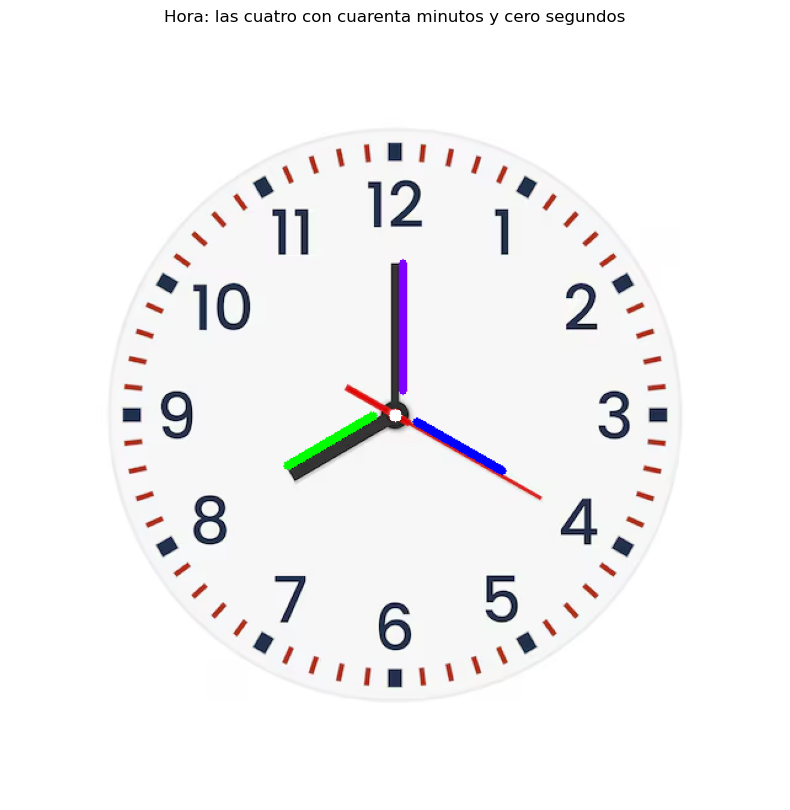

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Cargar imagen y convertir a RGB
imagen_bgr = cv2.imread('reloj3.png')
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

# Preprocesamiento
gris = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)
gris = cv2.GaussianBlur(gris, (5, 5), 1)
gris = cv2.equalizeHist(gris)
bordes = cv2.Canny(gris, 50, 150)

# Detección de líneas
lineas = cv2.HoughLinesP(bordes, 1, np.pi / 180, threshold=80, minLineLength=50, maxLineGap=15)

# Centro de la imagen (se asume que el reloj está centrado)
centro_x = imagen_bgr.shape[1] // 2
centro_y = imagen_bgr.shape[0] // 2

# Función para convertir número a texto en español
def numero_a_texto(n):
    nombres = [
        'cero', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis', 'siete', 'ocho', 'nueve', 'diez',
        'once', 'doce', 'trece', 'catorce', 'quince', 'dieciséis', 'diecisiete', 'dieciocho', 'diecinueve',
        'veinte', 'veintiuno', 'veintidós', 'veintitrés', 'veinticuatro', 'veinticinco', 'veintiséis',
        'veintisiete', 'veintiocho', 'veintinueve', 'treinta', 'treinta y uno', 'treinta y dos', 'treinta y tres',
        'treinta y cuatro', 'treinta y cinco', 'treinta y seis', 'treinta y siete', 'treinta y ocho',
        'treinta y nueve', 'cuarenta', 'cuarenta y uno', 'cuarenta y dos', 'cuarenta y tres', 'cuarenta y cuatro',
        'cuarenta y cinco', 'cuarenta y seis', 'cuarenta y siete', 'cuarenta y ocho', 'cuarenta y nueve',
        'cincuenta', 'cincuenta y uno', 'cincuenta y dos', 'cincuenta y tres', 'cincuenta y cuatro',
        'cincuenta y cinco', 'cincuenta y seis', 'cincuenta y siete', 'cincuenta y ocho', 'cincuenta y nueve', 'sesenta'
    ]
    return nombres[n] if 0 <= n < len(nombres) else str(n)

# Calcular ángulo de una línea respecto al centro (0° = 12, en sentido horario)
def calcular_angulo(x1, y1, x2, y2):
    dist1 = np.hypot(x1 - centro_x, y1 - centro_y)
    dist2 = np.hypot(x2 - centro_x, y2 - centro_y)
    if dist1 < dist2:
        dx = x2 - centro_x
        dy = centro_y - y2
    else:
        dx = x1 - centro_x
        dy = centro_y - y1
    angulo = np.degrees(np.arctan2(dy, dx))
    angulo = (90 - angulo) % 360  # 0° apunta hacia arriba
    return angulo

# Detectar manecillas candidatas
manecillas = []
if lineas is not None:
    for linea in lineas:
        x1, y1, x2, y2 = linea[0]
        longitud = np.hypot(x2 - x1, y2 - y1)
        distancia_centro = min(np.hypot(x1 - centro_x, y1 - centro_y), np.hypot(x2 - centro_x, y2 - centro_y))

        if distancia_centro < 100 and longitud > 30:
            angulo = calcular_angulo(x1, y1, x2, y2)
            manecillas.append({
                'puntos': (x1, y1, x2, y2),
                'longitud': longitud,
                'angulo': angulo
            })

# Continuar si se detectaron al menos 3 manecillas
if len(manecillas) >= 3:
    # Ordenar por longitud (más corta = hora, media = minutos, larga = segundos)
    manecillas.sort(key=lambda x: x['longitud'])

    horario = manecillas[0]
    minutero = manecillas[1]
    segundero = manecillas[2]

    # Calcular hora
    hora = int((horario['angulo'] / 30) % 12)
    minutos = int((minutero['angulo'] / 6) % 60)
    segundos = int((segundero['angulo'] / 6) % 60)

    # Ajustar hora si está entre horas
    fraccion_hora = (horario['angulo'] / 30) % 12
    if abs(fraccion_hora - hora) > 0.5:
        hora = (hora + 1) % 12

    # Conversión a texto
    hora_texto = "la una" if hora == 1 else f"las {numero_a_texto(hora)}"
    minutos_texto = numero_a_texto(minutos)
    segundos_texto = numero_a_texto(segundos)

    # Dibujar manecillas
    imagen_resultado = imagen_rgb.copy()
    cv2.circle(imagen_resultado, (centro_x, centro_y), 5, (255, 255, 255), -1)
    cv2.line(imagen_resultado, (horario['puntos'][0], horario['puntos'][1]), (horario['puntos'][2], horario['puntos'][3]), (0, 0, 255), 5)  # rojo = hora
    cv2.line(imagen_resultado, (minutero['puntos'][0], minutero['puntos'][1]), (minutero['puntos'][2], minutero['puntos'][3]), (0, 255, 0), 5)  # verde = minutos
    cv2.line(imagen_resultado, (segundero['puntos'][0], segundero['puntos'][1]), (segundero['puntos'][2], segundero['puntos'][3]), (127, 0, 255), 5)  # morado = segundos

    # Mostrar resultado
    plt.figure(figsize=(10, 10))
    plt.imshow(imagen_resultado)
    plt.title(f'Hora: {hora_texto} con {minutos_texto} minutos y {segundos_texto} segundos')
    plt.axis('off')
    plt.show()
